# Raising Awareness Of Air Pollution In Nigeria

## Importing necessary libraries

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Dataset

In [2]:
# Reading csv into DataFrame object
df = pd.read_csv('portharcourt_data.csv')

In [3]:
# checking if the file is read properly
df

,created_at,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
0,2021-07-26 16:45:59 UTC,198,89,50,40.78
1,2021-07-26 16:48:03 UTC,199,89,50,40.09
2,2021-07-26 16:49:59 UTC,200,89,50,37.93
3,2021-07-26 16:54:03 UTC,201,89,50,33.18
4,2021-07-26 16:55:59 UTC,202,89,50,37.84
...,...,...,...,...,...
56047,2021-10-25 09:28:43 UTC,56245,87,61,29.17
56048,2021-10-25 09:30:43 UTC,56246,87,61,29.57
56049,2021-10-25 09:32:44 UTC,56247,87,61,28.75
56050,2021-10-25 09:34:44 UTC,56248,87,61,29.97


## Exploratory Data Analysis

### Checking missing data

In [4]:
# Checking missing data
print(df.isnull().any())

created_at         False
entry_id           False
Temperature_F      False
Humidity_%         False
PM2.5_ATM_ug/m3    False
dtype: bool


### Checking DataFrame info

In [5]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56052 entries, 0 to 56051
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   created_at       56052 non-null  object 
 1   entry_id         56052 non-null  int64  
 2   Temperature_F    56052 non-null  int64  
 3   Humidity_%       56052 non-null  int64  
 4   PM2.5_ATM_ug/m3  56052 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ MB


Data consist of mostly numeric data and the `created_at` is an object. Maybe we can convert to a datetime type.

### Checking descriptive statistics of the data

In [6]:
# Checking descriptive statistics of the data
df.describe()

,entry_id,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
count,56052.000000,56052.000000,56052.000000,56052.000000
mean,28223.500000,84.821469,65.117766,54.391926
std,16180.962981,4.319505,8.550730,42.205997
min,198.000000,70.000000,29.000000,0.780000
25%,14210.750000,82.000000,61.000000,30.170000
50%,28223.500000,84.000000,68.000000,41.450000
75%,42236.250000,87.000000,71.000000,61.190000
max,56249.000000,108.000000,89.000000,568.080000


There are 56052 datapoints. The mean and 50% values for `Temperatur_F` and `Humidity_%` are quite close. This shows that outliers might not exist in these 2 features. For `PM2.5`, there is a huge difference between the mean and the 50% value, I suspect outliers. Also the minimum and maximum value are so far apart. Also max value for this feature is far from the 75%.

### Correlation between Temperature, Humidity and PM2.5 levels

In [7]:
# Correlation between Temperature, Humidity and PM2.5 levels
df[['Temperature_F', 'Humidity_%','PM2.5_ATM_ug/m3']].corr()

,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
Temperature_F,1.000000,-0.945404,-0.304438
Humidity_%,-0.945404,1.000000,0.323848
PM2.5_ATM_ug/m3,-0.304438,0.323848,1.000000


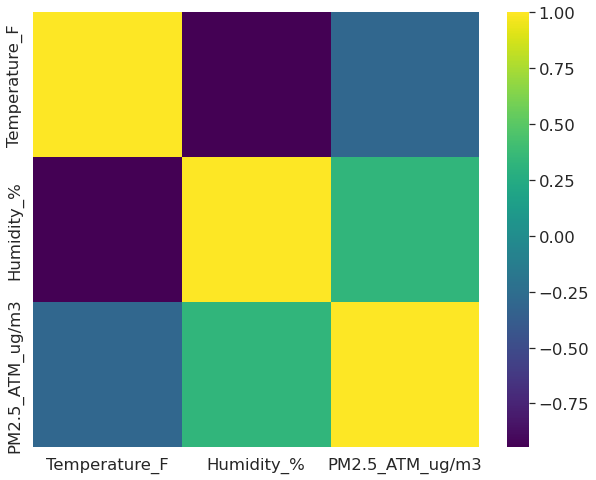

In [14]:
# Heat Map
plt.figure(figsize=(10,8))
sns.set(font_scale = 1.5)
sns.heatmap(data=df[['Temperature_F', 'Humidity_%','PM2.5_ATM_ug/m3']].corr(), cmap='viridis')
plt.show()

* Temperature and Humidty are strongly negatively correlated
* Temperature and PM2.5 levels are weakly negatively correlated
* Humdity and PM2.5 levels are weakly positively correlated

### Relation between the features

<Figure size 1200x800 with 0 Axes>

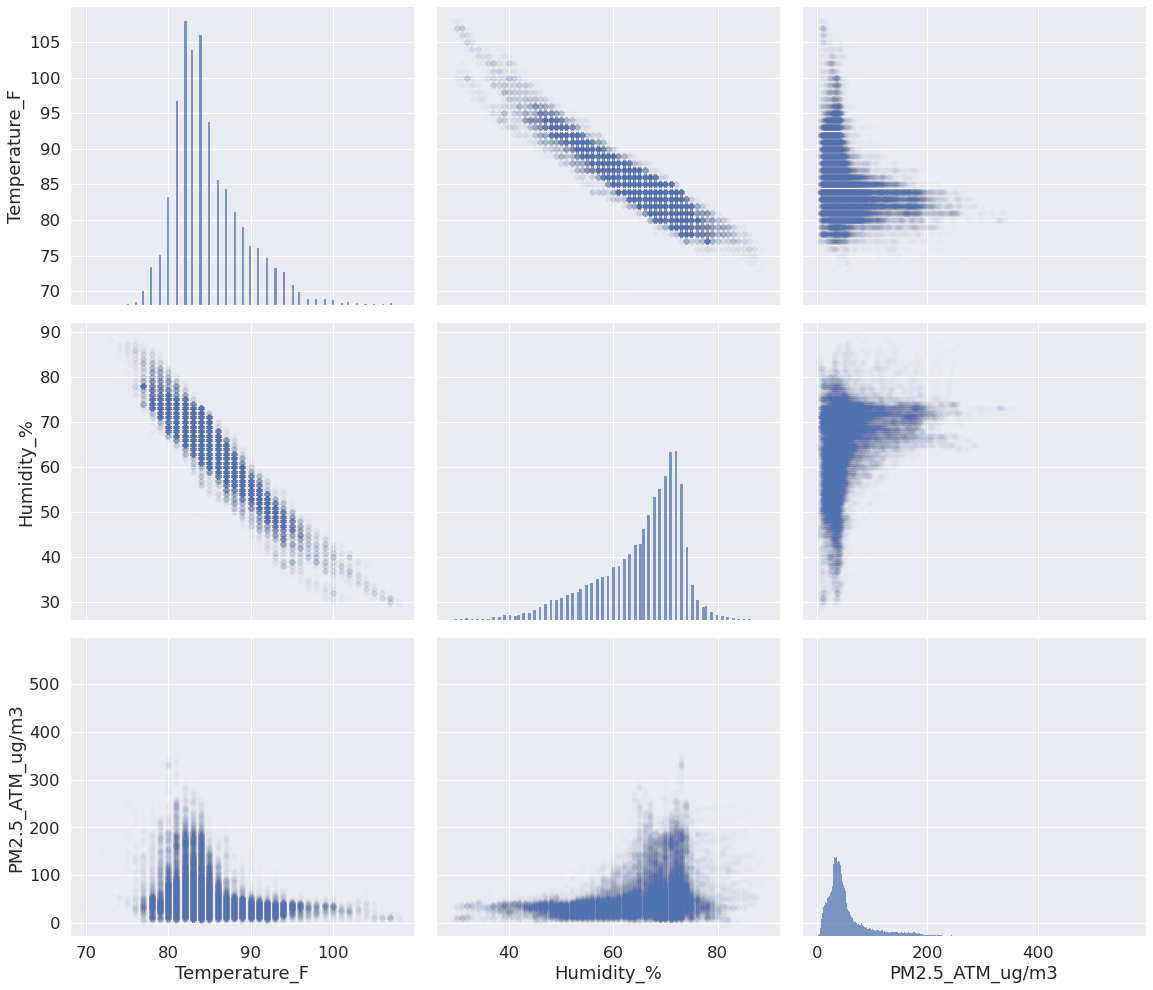

In [12]:
plt.figure(dpi=200)
sns.set_context("paper", rc={"axes.labelsize":18})
sns.set(font_scale = 1.5)
pairplot = sns.pairplot(data = df.drop('entry_id', axis=1), plot_kws=dict(linewidth=1, alpha=0.01), palette='magma')
pairplot.fig.set_size_inches(18, 15)
plt.show()